In [11]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
x = df.iloc[:,:7]
y = df.loc[:, 'Outcome']

In [12]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.2)

In [8]:
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

array([[0.57575306, 0.42424694],
       [0.64919057, 0.35080943],
       [0.88857673, 0.11142327],
       [0.93489896, 0.06510104],
       [0.75902206, 0.24097794],
       [0.68287104, 0.31712896],
       [0.65777666, 0.34222334],
       [0.87759474, 0.12240526],
       [0.81143521, 0.18856479],
       [0.76609538, 0.23390462],
       [0.6077459 , 0.3922541 ],
       [0.89633692, 0.10366308],
       [0.01384713, 0.98615287],
       [0.3726988 , 0.6273012 ],
       [0.96184844, 0.03815156],
       [0.31386505, 0.68613495],
       [0.71366909, 0.28633091],
       [0.68961563, 0.31038437],
       [0.88193614, 0.11806386],
       [0.88331146, 0.11668854],
       [0.56476331, 0.43523669],
       [0.88033198, 0.11966802],
       [0.13173309, 0.86826691],
       [0.82695116, 0.17304884],
       [0.92065769, 0.07934231],
       [0.57138696, 0.42861304],
       [0.78081404, 0.21918596],
       [0.35831579, 0.64168421],
       [0.88686868, 0.11313132],
       [0.56119151, 0.43880849],
       [0.

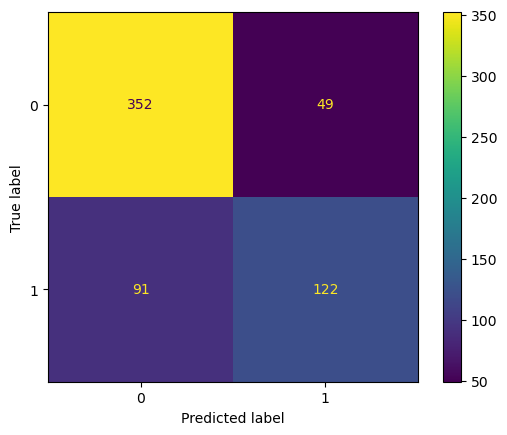

In [13]:
plot_confusion_matrix(model, x_train, y_train)

In [14]:
model.score(x_train, y_train)

0.7719869706840391

In [15]:
model.score(x_test, y_test)

0.7727272727272727

In [16]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[89 10]
 [25 30]]
*********************************************
Accuracy Score: 0.7727272727272727
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [17]:
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[352  49]
 [ 91 122]]
*********************************************
Accuracy Score: 0.7719869706840391
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.57      0.64       213

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.73       614
weighted avg       0.77      0.77      0.77       614



In [18]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting cklass 1 probability

fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])
thresh

array([1.96370829, 0.96370829, 0.95649468, 0.94306986, 0.93990893,
       0.91435104, 0.90511504, 0.85473392, 0.85432795, 0.84539881,
       0.84520706, 0.81690164, 0.81356935, 0.80780334, 0.80520209,
       0.7959729 , 0.79139018, 0.77871917, 0.77851603, 0.77744373,
       0.75821939, 0.75134375, 0.74802309, 0.74028476, 0.739069  ,
       0.73349889, 0.73308436, 0.72527969, 0.72049148, 0.71103642,
       0.70840668, 0.67905463, 0.67696154, 0.66892745, 0.66267162,
       0.65436248, 0.6413427 , 0.62337161, 0.61899255, 0.60983895,
       0.60452649, 0.59671245, 0.5954901 , 0.59504508, 0.5932422 ,
       0.59209699, 0.59100085, 0.59000701, 0.58624736, 0.57595329,
       0.57456229, 0.56699568, 0.56521337, 0.55793334, 0.55336699,
       0.54605734, 0.53757361, 0.53273898, 0.52898706, 0.51675361,
       0.51524546, 0.5146368 , 0.51062035, 0.50823677, 0.50217164,
       0.49512546, 0.49101146, 0.49028255, 0.48266252, 0.48238601,
       0.47957456, 0.47317082, 0.43341017, 0.43326701, 0.43018

In [19]:
import pickle 

In [21]:
with open('LogisticModelDiabetes.pkl', 'wb') as f:
    pickle.dump(model,f)